In [ ]:
#install modules which are not included into Google Colab
!pip install tf_explain
!pip3 install pickle5

     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 132 kB 12.1 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219292 sha256=6e67892313b0d6eeed34e416a4792f46192a96fc6dee9f414d782bb20dbfeac0
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


import modules and test plots

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tf_explain.core.smoothgrad import SmoothGrad
import matplotlib.pyplot as plt
from tf_explain.core.grad_cam import GradCAM #Doesnt work anymore
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity #needs patch size
from tf_explain.core.integrated_gradients import IntegratedGradients
plots_test = np.load("/content/drive/MyDrive/clean_Helcaraxe/Helcaraxe_elenwe_Iobs_test_plots.npy")

load test labels

In [ ]:
import pickle5 as pickle
with open("/content/drive/MyDrive/clean_Helcaraxe/helcaraxe_elenwe_Iobs_test_labels.pkl", "rb") as fh:
  maindf = pickle.load(fh)
#maindf = maindf.sort_values(by="PDB ID ")
print(maindf.columns)
bin_label = np.asarray(maindf["Ice-Ring"])

Index(['Plots', 'Ice-Ring', 'PDB-ID'], dtype='object')


Remove plots and labels which were marked as havin cut out intensities

In [ ]:
#clean deleted plots
fin_plots_test, labels = [],[]
print(len(bin_label),len(plots_test))
for i, lab in enumerate(bin_label):
  if lab == "99" or lab == 99:
    pass
  else:
    fin_plots_test.append(plots_test[i])
    labels.append(bin_label[i])

print(len(labels),len(fin_plots_test))
fin_plots_test = np.asarray(fin_plots_test)
label = tf.keras.utils.to_categorical(labels, num_classes=2)

1436 1436
1408 1408


Load model prepared by Smooth_Grad_model_prepper.ipynb

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/clean_Helcaraxe/class_model_elenwe_Iobs_resub")

Call SmoothGrad on all plots and then average them

In [ ]:
n = "all_training"
def gridder(cindex, index):
    grid_lst = []
    for i,plot in enumerate(fin_plots_test):
      if label[i][1] > 0.5:
        data = ([plot], None)
        grid = SmoothGrad().explain(data, model, class_index=cindex)
        grid_lst.append(grid)
    return grid_lst

#average all plots
class_0 = np.average(gridder(0,n), axis=0)
class_1 = np.average(gridder(1,n), axis=0)

display and save the results

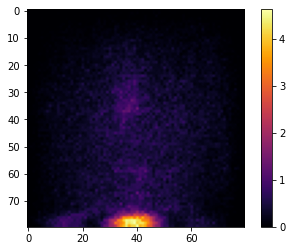

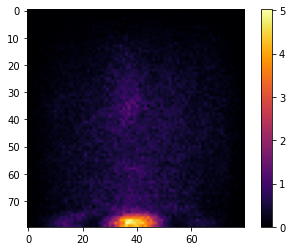

In [ ]:
plt.imshow(class_0, cmap="inferno")
plt.colorbar()
plt.savefig("/content/drive/MyDrive/clean_Helcaraxe/smooth_grad_images/Iobs_test_class_0.svg")
plt.show()

plt.imshow(class_1, cmap="inferno")
plt.colorbar()
plt.savefig("/content/drive/MyDrive/clean_Helcaraxe/smooth_grad_images/Iobs_test_class_1.svg")
plt.show()

Show all images of ice rings and the respective SmoothGrad output

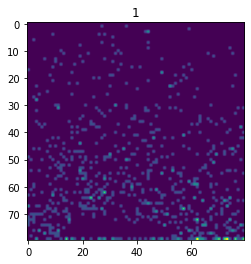

tf.Tensor([0.5095848  0.49041522], shape=(2,), dtype=float32)


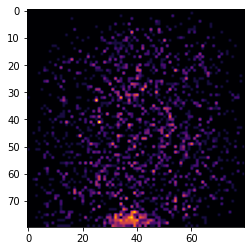

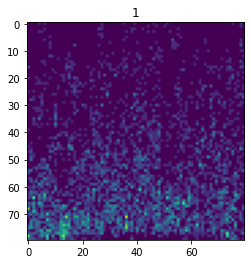

tf.Tensor([0.519258   0.48074198], shape=(2,), dtype=float32)


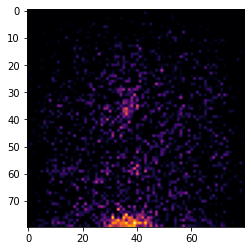

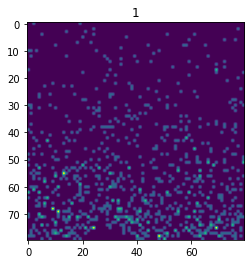

tf.Tensor([0.5005964  0.49940357], shape=(2,), dtype=float32)


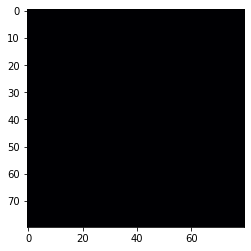

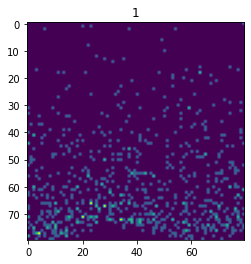

tf.Tensor([0.5141447  0.48585528], shape=(2,), dtype=float32)


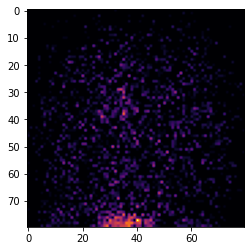

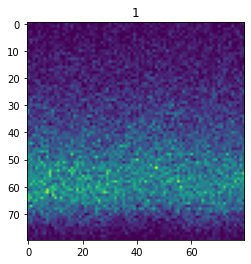

tf.Tensor([0.5182605  0.48173952], shape=(2,), dtype=float32)


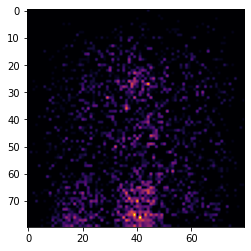

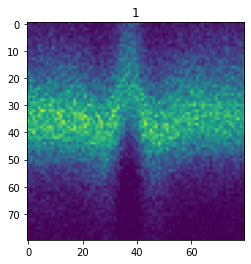

tf.Tensor([0.5046587 0.4953413], shape=(2,), dtype=float32)


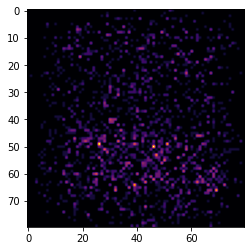

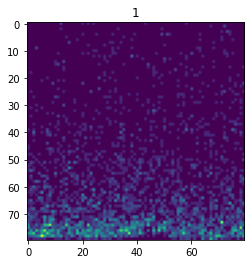

tf.Tensor([0.50067294 0.49932706], shape=(2,), dtype=float32)


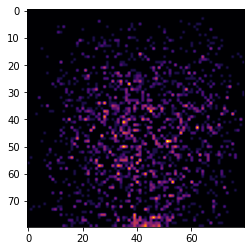

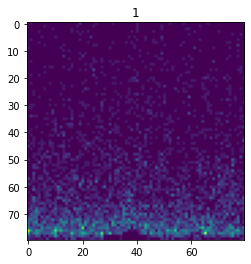

tf.Tensor([0.5171132  0.48288682], shape=(2,), dtype=float32)


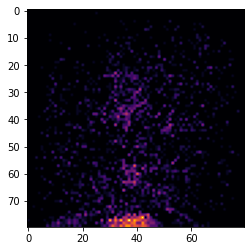

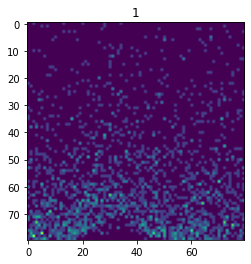

tf.Tensor([0.51956725 0.4804327 ], shape=(2,), dtype=float32)


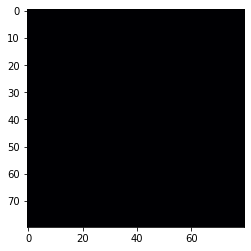

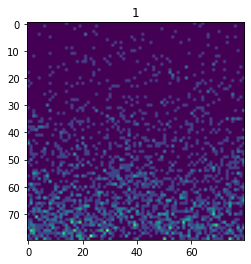

tf.Tensor([0.5193276  0.48067242], shape=(2,), dtype=float32)


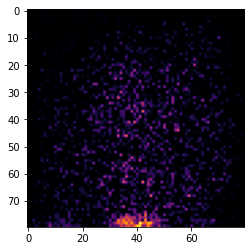

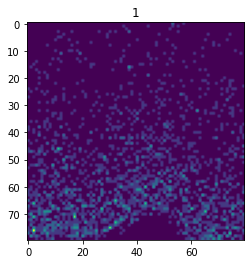

tf.Tensor([0.51956797 0.48043203], shape=(2,), dtype=float32)


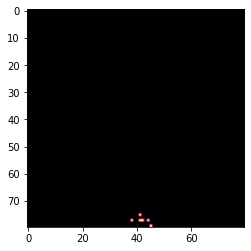

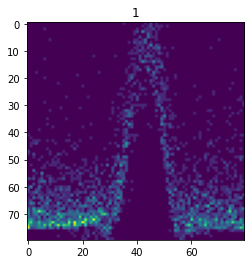

tf.Tensor([0.51957023 0.4804298 ], shape=(2,), dtype=float32)


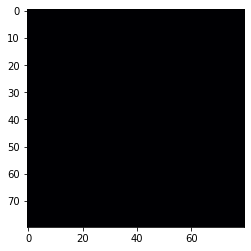

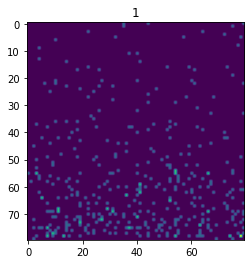

tf.Tensor([0.5006422 0.4993578], shape=(2,), dtype=float32)


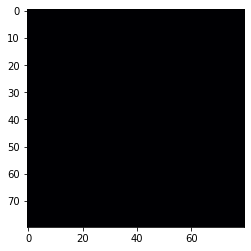

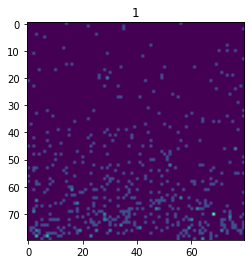

tf.Tensor([0.50364465 0.49635535], shape=(2,), dtype=float32)


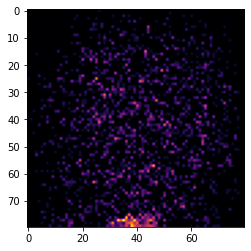

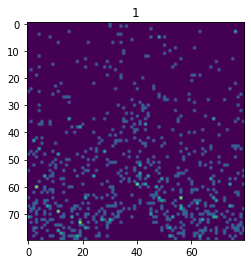

tf.Tensor([0.5195556  0.48044434], shape=(2,), dtype=float32)


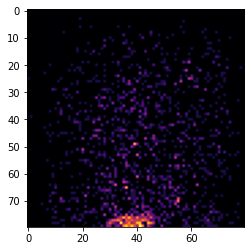

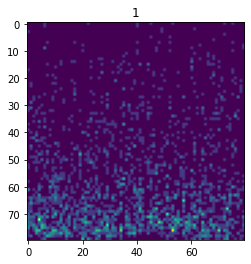

tf.Tensor([0.5129492  0.48705077], shape=(2,), dtype=float32)


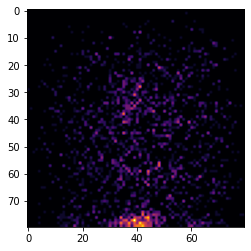

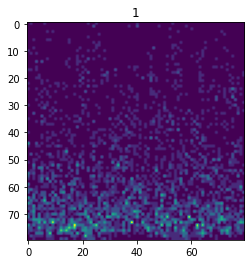

tf.Tensor([0.5161445  0.48385546], shape=(2,), dtype=float32)


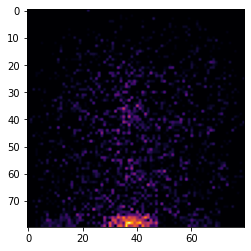

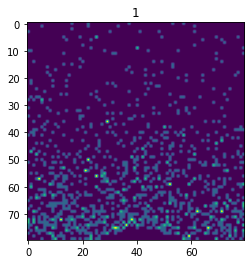

tf.Tensor([0.5084263  0.49157366], shape=(2,), dtype=float32)


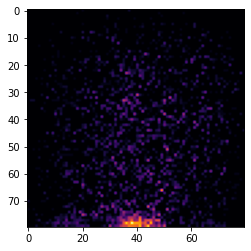

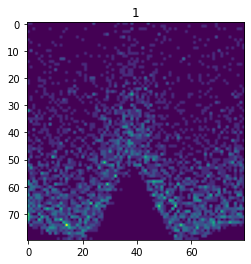

tf.Tensor([0.5195725  0.48042753], shape=(2,), dtype=float32)


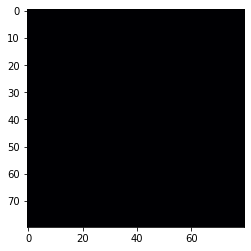

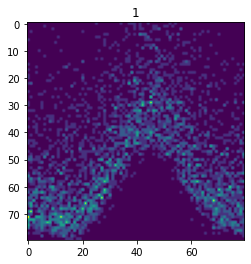

tf.Tensor([0.5195702 0.4804298], shape=(2,), dtype=float32)


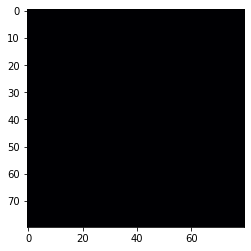

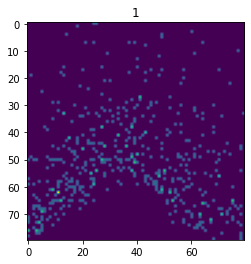

tf.Tensor([0.5195699  0.48043013], shape=(2,), dtype=float32)


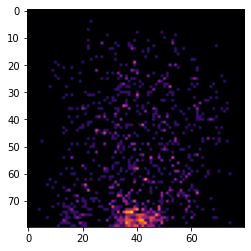

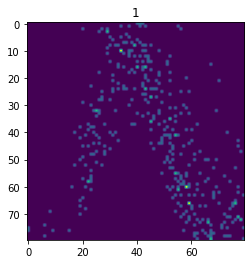

tf.Tensor([0.5195622 0.4804378], shape=(2,), dtype=float32)


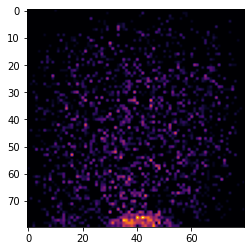

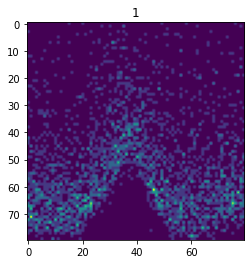

tf.Tensor([0.5195724 0.4804276], shape=(2,), dtype=float32)


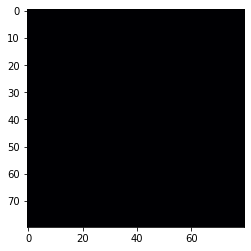

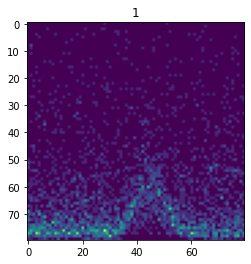

tf.Tensor([0.5195599  0.48044002], shape=(2,), dtype=float32)


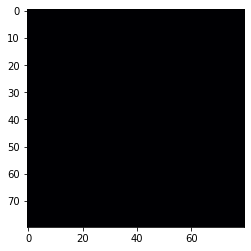

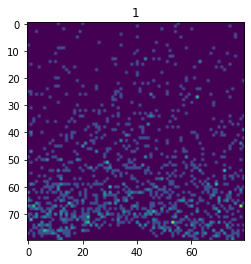

tf.Tensor([0.5195672  0.48043275], shape=(2,), dtype=float32)


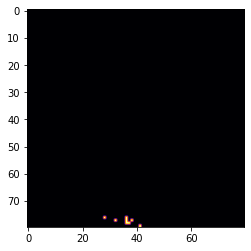

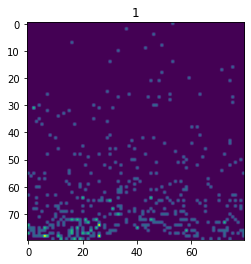

tf.Tensor([0.51591367 0.48408633], shape=(2,), dtype=float32)


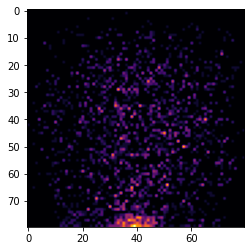

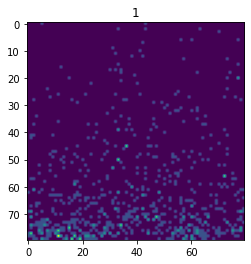

tf.Tensor([0.51852524 0.4814748 ], shape=(2,), dtype=float32)


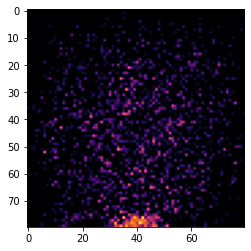

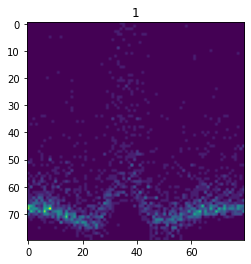

tf.Tensor([0.51954544 0.48045456], shape=(2,), dtype=float32)


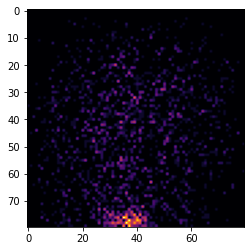

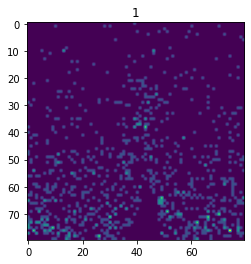

tf.Tensor([0.519518   0.48048198], shape=(2,), dtype=float32)


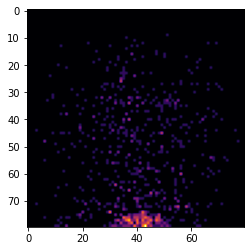

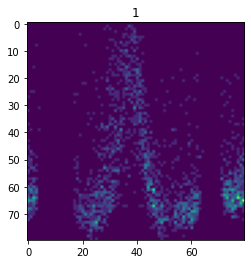

tf.Tensor([0.51953053 0.48046944], shape=(2,), dtype=float32)


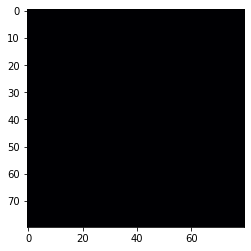

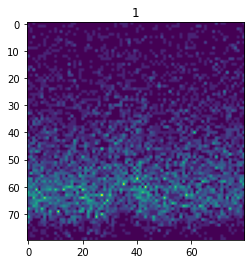

tf.Tensor([0.50860715 0.4913929 ], shape=(2,), dtype=float32)


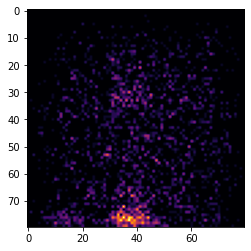

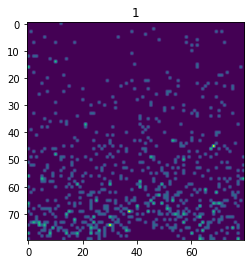

tf.Tensor([0.50385916 0.49614084], shape=(2,), dtype=float32)


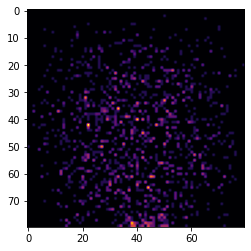

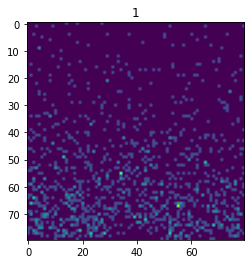

tf.Tensor([0.5194941  0.48050585], shape=(2,), dtype=float32)


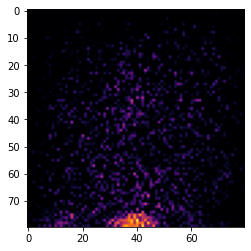

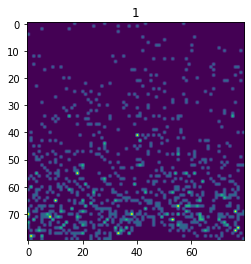

tf.Tensor([0.51035196 0.489648  ], shape=(2,), dtype=float32)


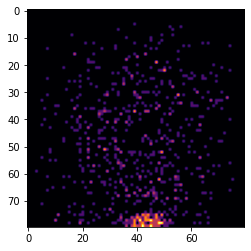

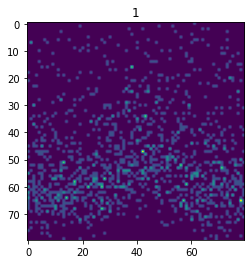

tf.Tensor([0.5195568  0.48044318], shape=(2,), dtype=float32)


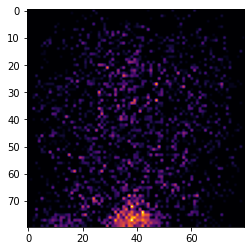

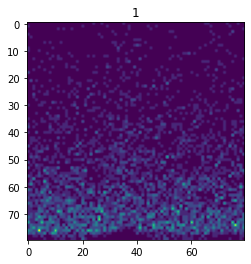

tf.Tensor([0.5195341  0.48046583], shape=(2,), dtype=float32)


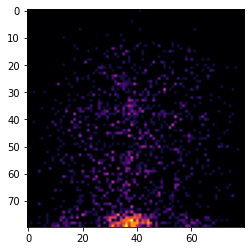

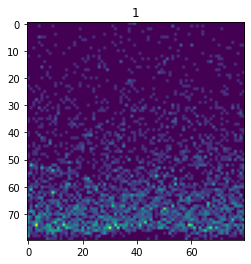

tf.Tensor([0.51200837 0.48799163], shape=(2,), dtype=float32)


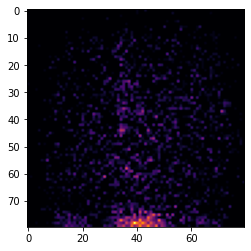

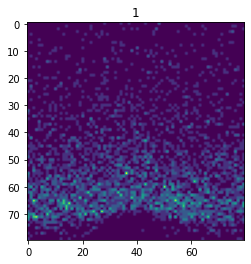

tf.Tensor([0.5195708  0.48042914], shape=(2,), dtype=float32)


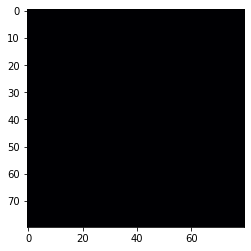

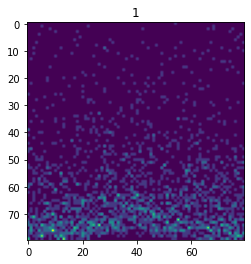

tf.Tensor([0.51945645 0.48054355], shape=(2,), dtype=float32)


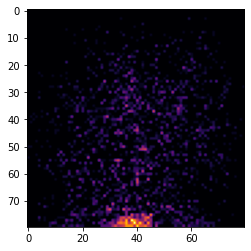

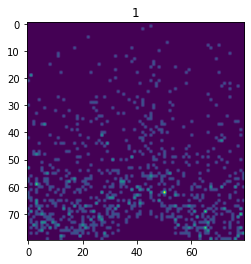

tf.Tensor([0.5195462 0.4804538], shape=(2,), dtype=float32)


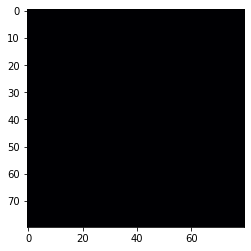

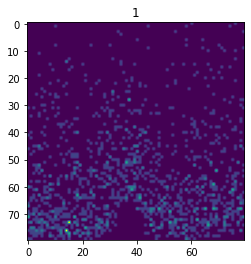

tf.Tensor([0.5195707  0.48042932], shape=(2,), dtype=float32)


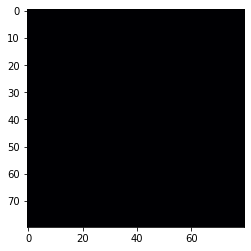

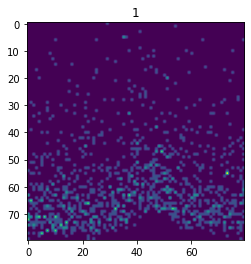

tf.Tensor([0.5195344  0.48046565], shape=(2,), dtype=float32)


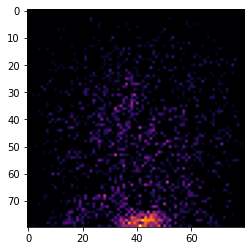

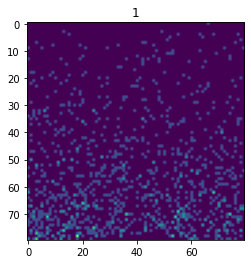

tf.Tensor([0.5006331  0.49936685], shape=(2,), dtype=float32)


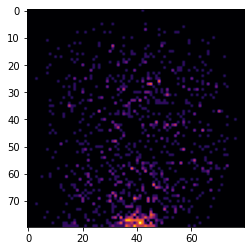

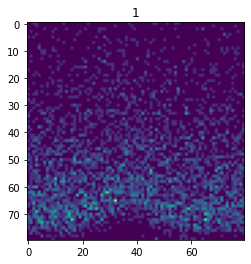

tf.Tensor([0.5195717  0.48042828], shape=(2,), dtype=float32)


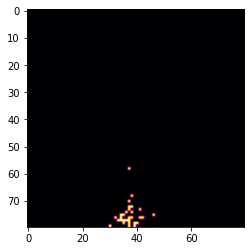

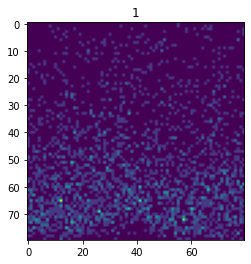

tf.Tensor([0.51888657 0.4811134 ], shape=(2,), dtype=float32)


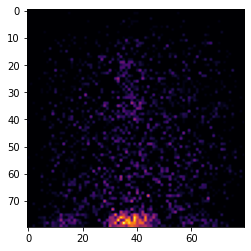

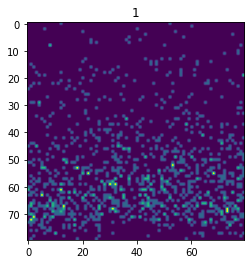

tf.Tensor([0.51793927 0.48206067], shape=(2,), dtype=float32)


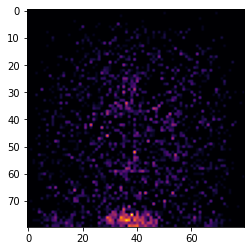

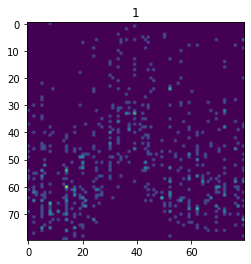

tf.Tensor([0.5195647  0.48043534], shape=(2,), dtype=float32)


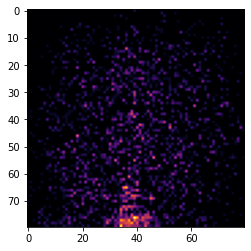

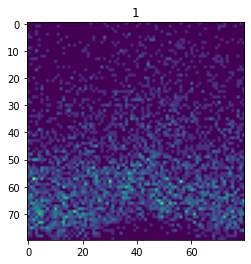

tf.Tensor([0.51956904 0.480431  ], shape=(2,), dtype=float32)


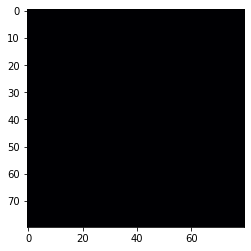

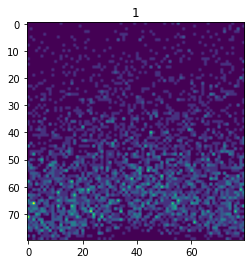

tf.Tensor([0.51955163 0.4804484 ], shape=(2,), dtype=float32)


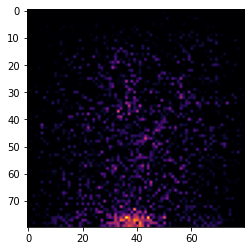

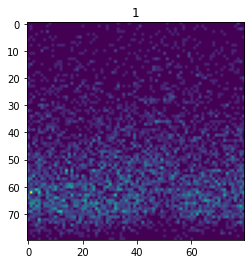

tf.Tensor([0.51833    0.48167005], shape=(2,), dtype=float32)


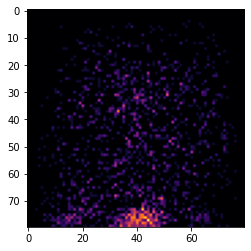

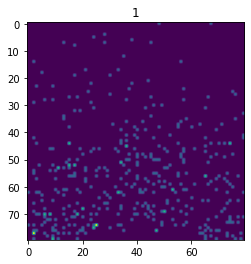

tf.Tensor([0.5167148  0.48328516], shape=(2,), dtype=float32)


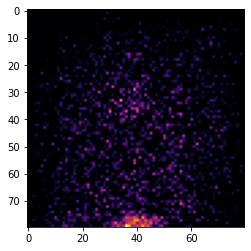

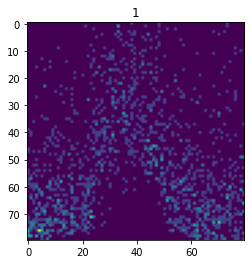

tf.Tensor([0.519572   0.48042795], shape=(2,), dtype=float32)


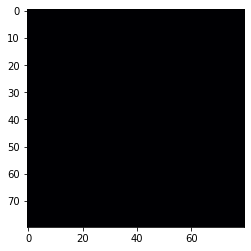

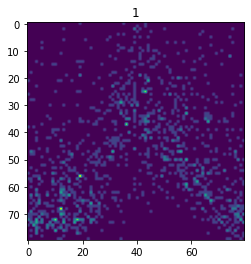

tf.Tensor([0.51956725 0.4804327 ], shape=(2,), dtype=float32)


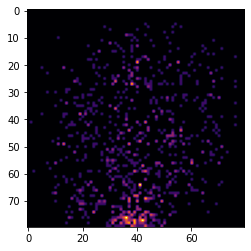

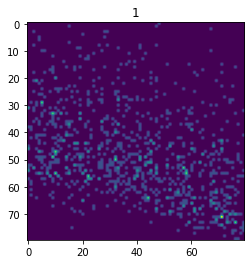

tf.Tensor([0.5171819  0.48281813], shape=(2,), dtype=float32)


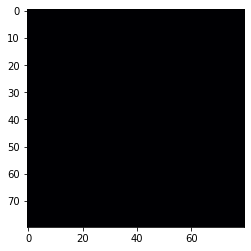

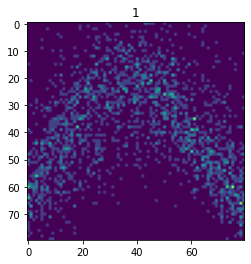

tf.Tensor([0.5193521  0.48064792], shape=(2,), dtype=float32)


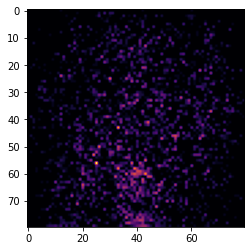

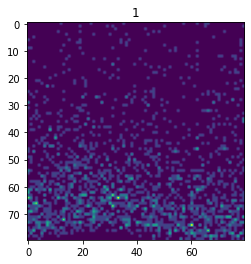

tf.Tensor([0.51559967 0.4844003 ], shape=(2,), dtype=float32)


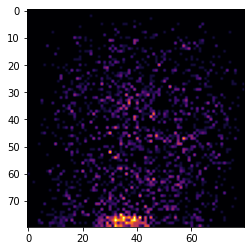

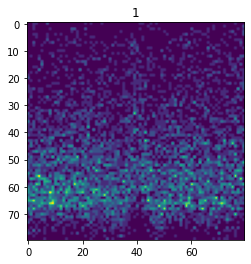

tf.Tensor([0.5009016 0.4990984], shape=(2,), dtype=float32)


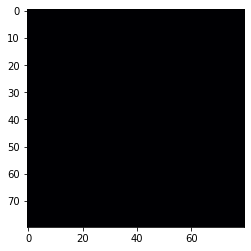

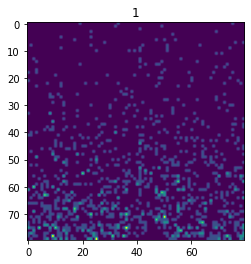

tf.Tensor([0.5116679  0.48833206], shape=(2,), dtype=float32)


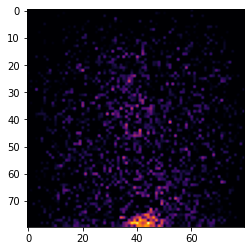

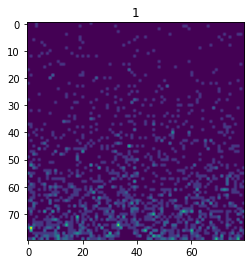

tf.Tensor([0.5005868  0.49941322], shape=(2,), dtype=float32)


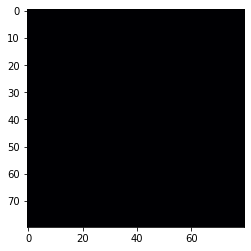

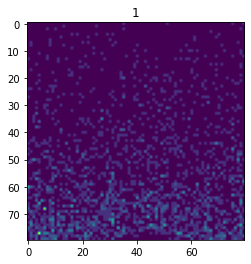

tf.Tensor([0.50226694 0.49773312], shape=(2,), dtype=float32)


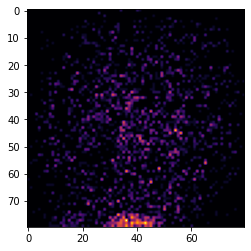

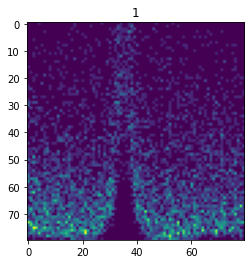

tf.Tensor([0.51957196 0.480428  ], shape=(2,), dtype=float32)


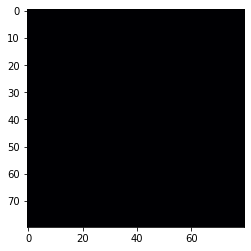

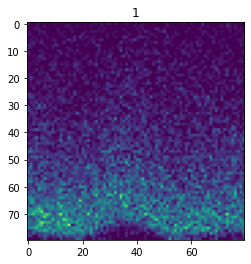

tf.Tensor([0.51957226 0.48042774], shape=(2,), dtype=float32)


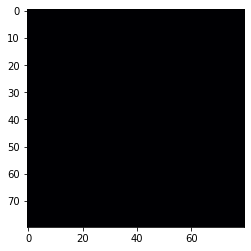

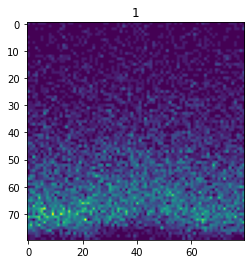

tf.Tensor([0.5195704  0.48042956], shape=(2,), dtype=float32)


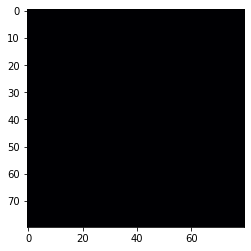

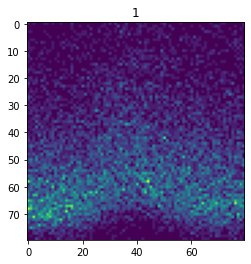

tf.Tensor([0.5195723  0.48042768], shape=(2,), dtype=float32)


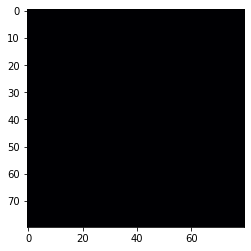

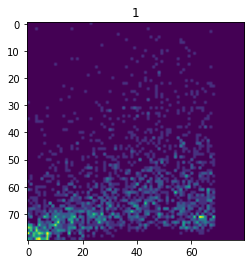

tf.Tensor([0.5195527  0.48044726], shape=(2,), dtype=float32)


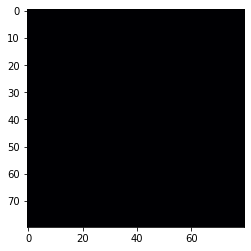

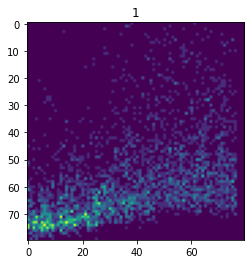

tf.Tensor([0.519144 0.480856], shape=(2,), dtype=float32)


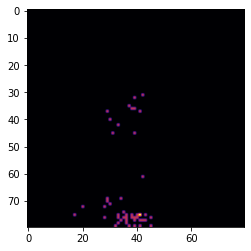

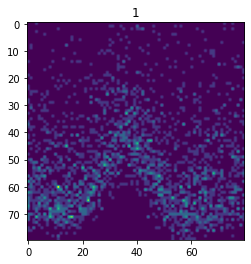

tf.Tensor([0.5195724 0.4804276], shape=(2,), dtype=float32)


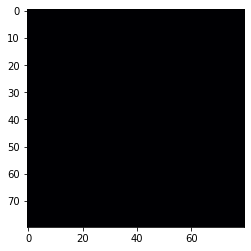

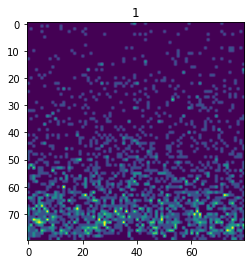

tf.Tensor([0.51527596 0.48472401], shape=(2,), dtype=float32)


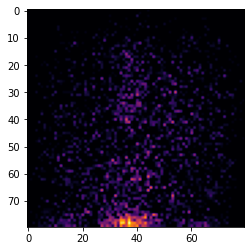

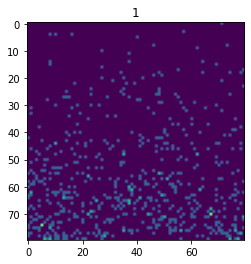

tf.Tensor([0.50061464 0.49938536], shape=(2,), dtype=float32)


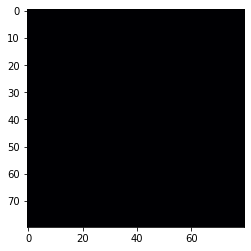

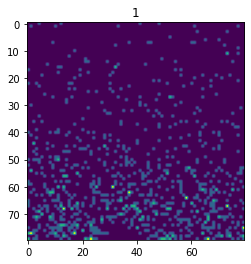

tf.Tensor([0.5171561  0.48284388], shape=(2,), dtype=float32)


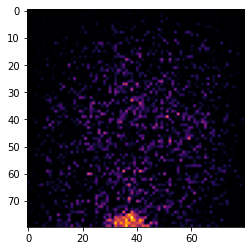

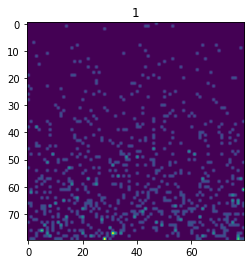

tf.Tensor([0.50272083 0.49727917], shape=(2,), dtype=float32)


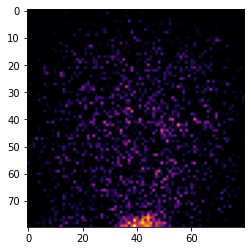

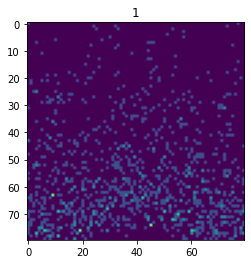

tf.Tensor([0.51932776 0.48067227], shape=(2,), dtype=float32)


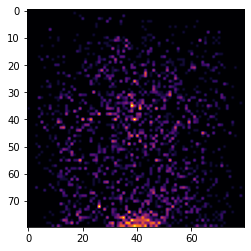

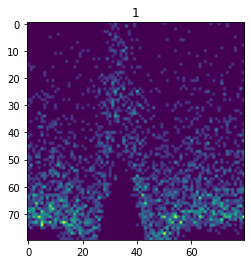

tf.Tensor([0.519571 0.480429], shape=(2,), dtype=float32)


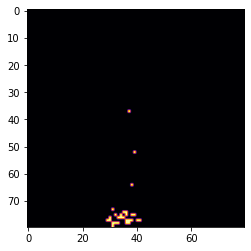

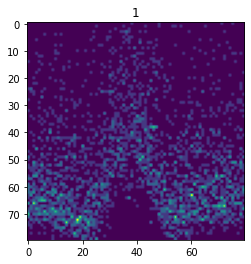

tf.Tensor([0.5195719  0.48042813], shape=(2,), dtype=float32)


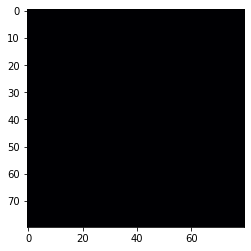

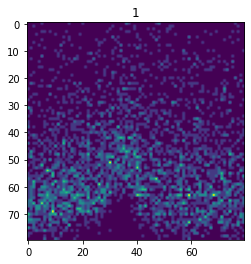

tf.Tensor([0.51957196 0.48042807], shape=(2,), dtype=float32)


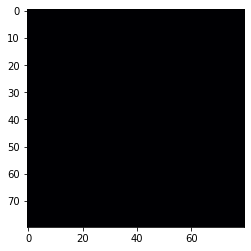

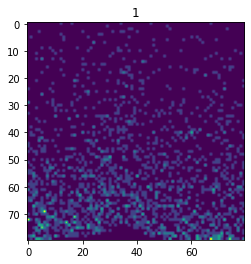

tf.Tensor([0.519565 0.480435], shape=(2,), dtype=float32)


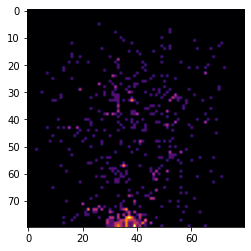

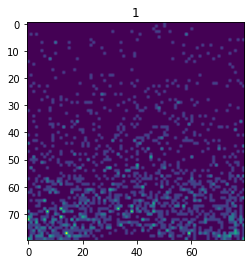

tf.Tensor([0.5193747  0.48062527], shape=(2,), dtype=float32)


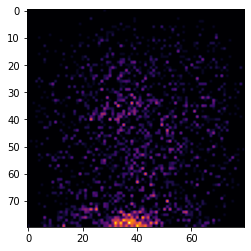

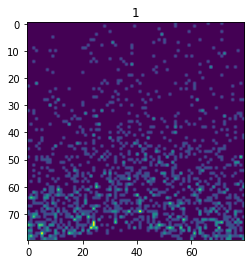

tf.Tensor([0.51955706 0.480443  ], shape=(2,), dtype=float32)


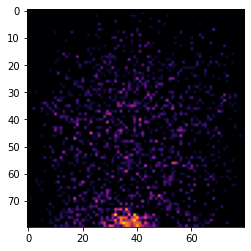

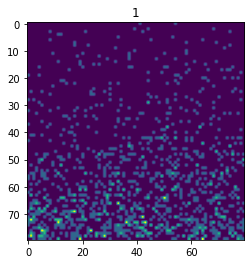

tf.Tensor([0.50058466 0.49941534], shape=(2,), dtype=float32)


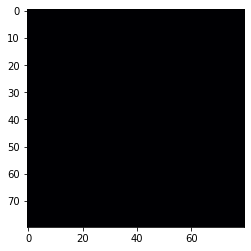

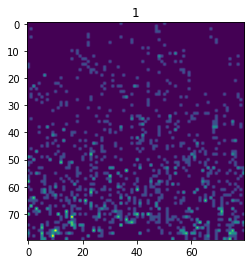

tf.Tensor([0.5183759 0.4816242], shape=(2,), dtype=float32)


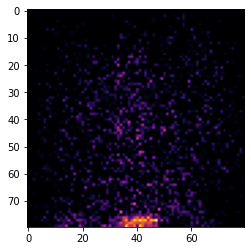

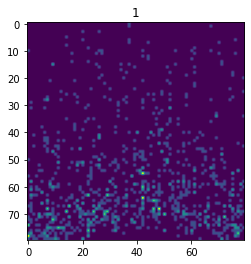

tf.Tensor([0.5183814  0.48161855], shape=(2,), dtype=float32)


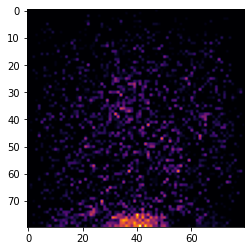

In [ ]:
prediction_lst = model(fin_plots_test)
for i, l in enumerate(labels):
  if int(l) == 1:
    resh_plot = fin_plots_test[i].reshape(80,80)
    plt.imshow(resh_plot)
    plt.title(str(l))
    plt.show()
    plt.close()

    if label[i][1] > 0.5:
      plot = fin_plots_test[i]
      data = ([plot], None)
      smplot = SmoothGrad().explain(data, model, class_index=1)
      plt.imshow(smplot, cmap="inferno")
      print(prediction_lst[i])
      plt.show()